# mapping the FENZ forecasts

In [1]:
%matplotlib inline

In [2]:
import os
import sys
import pathlib

In [3]:
import numpy as np
import pandas as pd

import geopandas as gpd

import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
from matplotlib import patheffects
from matplotlib.transforms import offset_copy

### loads the local functions

In [4]:
sys.path.append(str(pathlib.Path.cwd().parent))

In [5]:
from lib import *

### defines the path to the shapefiles 

In [6]:
shapes_path = pathlib.Path.cwd().parent / 'data' / 'shapes' / 'NZ_Regions' 

### build dictionnary with level: colors for mapping of rainfall forecasts 

In [7]:
outlook_rgb = [[255, 244, 65], [255, 159, 65], [255, 159, 65], [255,255,255]]

In [8]:
outlook_rgb = [rgb2hex(*x) for x in outlook_rgb]

In [9]:
outlook_rgb = dict(zip(['low', 'medium', 'high', 'missing'], outlook_rgb))

In [10]:
outlook_rgb

{'low': '#fff441',
 'medium': '#ff9f41',
 'high': '#ff9f41',
 'missing': '#ffffff'}

### set crs here 

**NOTE**: potential problems with the Mercator projection might be due to the version of `proj4` that is used

In [11]:
extent = [165, 179, -49, -33]

In [12]:
crs = ccrs.Mercator(latitude_true_scale=-40., min_latitude=extent[-2], max_latitude=extent[-1])

In [13]:
crs.proj4_params

{'ellps': 'WGS84',
 'proj': 'merc',
 'lon_0': 0.0,
 'x_0': 0.0,
 'y_0': 0.0,
 'units': 'm',
 'lat_ts': -40.0}

In [14]:
# crs = ccrs.PlateCarree()

### read the shapefile with the ICU EEZ geometries

In [15]:
shape_gpd = gpd.read_file(shapes_path / 'svr.shp')

In [16]:
shape_gpd = shape_gpd.loc[:,['REGC2018_1','geometry']]

In [17]:
shape_gpd

,REGC2018_1,geometry
0,Northland Region,"POLYGON ((173.12963 -34.21388, 173.14448 -34.2..."
1,Auckland Region,"POLYGON ((175.08383 -35.69983, 175.09081 -35.7..."
2,Waikato Region,"POLYGON ((176.02181 -36.37127, 176.02408 -36.3..."
3,Bay of Plenty Region,"POLYGON ((176.52044 -37.35487, 176.53142 -37.3..."
4,Gisborne Region,"POLYGON ((178.23342 -37.33333, 178.24408 -37.3..."
5,Hawke's Bay Region,"POLYGON ((177.12824 -38.58643, 177.27698 -38.6..."
6,Taranaki Region,"POLYGON ((174.61657 -38.72090, 174.61692 -38.7..."
7,Manawatu-Wanganui Region,"POLYGON ((175.54046 -38.47219, 175.56061 -38.4..."
8,Wellington Region,"POLYGON ((175.17321 -40.71964, 175.17339 -40.7..."
9,West Coast Region,"POLYGON ((172.24186 -40.82628, 172.24228 -40.8..."


In [18]:
shape_gpd = shape_gpd.drop(16, axis=0)

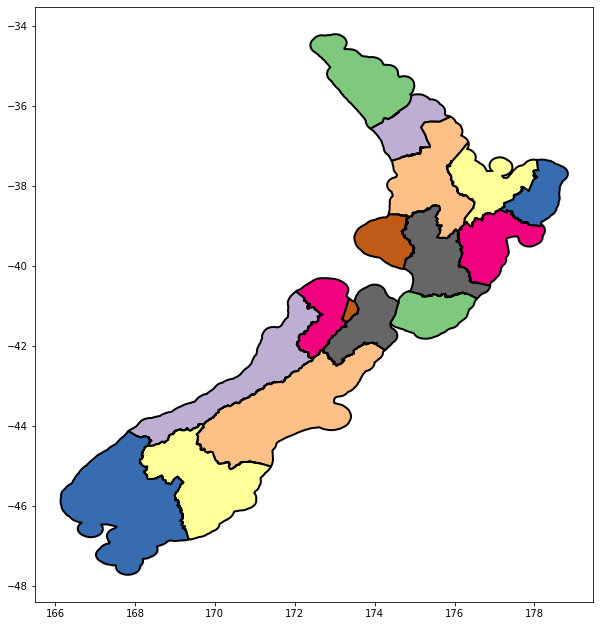

In [19]:
shape_gpd.plot(cmap=plt.cm.Accent, figsize=(10,15), lw=2, edgecolor="black")

### reads the table containing the rainfall forecasts 

### do not forget to set the climatological forecasts to -666 in the below CSV BEFORE loading it in this notebook

In [20]:
table = pd.read_csv(pathlib.Path.cwd().parent / 'data' / 'FENZ_Outlook.csv')

In [21]:
table = table.dropna()

In [22]:
table = table.iloc[:,1:]

In [23]:
shape_gpd.head()

,REGC2018_1,geometry
0,Northland Region,"POLYGON ((173.12963 -34.21388, 173.14448 -34.2..."
1,Auckland Region,"POLYGON ((175.08383 -35.69983, 175.09081 -35.7..."
2,Waikato Region,"POLYGON ((176.02181 -36.37127, 176.02408 -36.3..."
3,Bay of Plenty Region,"POLYGON ((176.52044 -37.35487, 176.53142 -37.3..."
4,Gisborne Region,"POLYGON ((178.23342 -37.33333, 178.24408 -37.3..."


In [24]:
shape_gpd_m = shape_gpd.merge(table, on='REGC2018_1')

In [25]:
shape_gpd_m = shape_gpd_m.replace({'none':'missing'})

In [26]:
shape_gpd_m

,REGC2018_1,geometry,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Northland Region,"POLYGON ((173.12963 -34.21388, 173.14448 -34.2...",missing,missing,missing,missing,missing,missing,missing
1,Auckland Region,"POLYGON ((175.08383 -35.69983, 175.09081 -35.7...",low,missing,missing,missing,missing,missing,missing
2,Waikato Region,"POLYGON ((176.02181 -36.37127, 176.02408 -36.3...",low,missing,missing,missing,missing,missing,missing
3,Bay of Plenty Region,"POLYGON ((176.52044 -37.35487, 176.53142 -37.3...",missing,medium,missing,missing,missing,missing,missing
4,Gisborne Region,"POLYGON ((178.23342 -37.33333, 178.24408 -37.3...",missing,medium,missing,missing,missing,missing,missing
5,Hawke's Bay Region,"POLYGON ((177.12824 -38.58643, 177.27698 -38.6...",missing,medium,medium,high,missing,missing,missing
6,Taranaki Region,"POLYGON ((174.61657 -38.72090, 174.61692 -38.7...",missing,missing,missing,missing,missing,missing,low
7,Manawatu-Wanganui Region,"POLYGON ((175.54046 -38.47219, 175.56061 -38.4...",missing,missing,missing,missing,missing,medium,missing
8,Wellington Region,"POLYGON ((175.17321 -40.71964, 175.17339 -40.7...",missing,missing,missing,high,high,missing,missing
9,West Coast Region,"POLYGON ((172.24186 -40.82628, 172.24228 -40.8...",missing,missing,missing,missing,missing,missing,missing


In [27]:
extent

[165, 179, -49, -33]

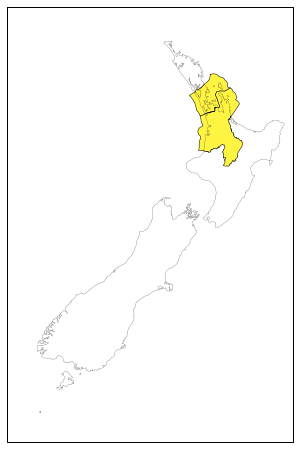

In [28]:
f, ax = plt.subplots(figsize=(11, 8), subplot_kw=dict(projection=crs))

make_choropleth(ax, shape_gpd_m, var='Monday', dict_colors=outlook_rgb)

draw_NZ(ax, extent = extent)

transform = ccrs.PlateCarree()._as_mpl_transform(ax)

#text_transform = offset_copy(transform, units='dots', x=-25)

# for i, row in shape_gpd.iterrows(): 
#     cname = row.name_to_plot
#     lon = row.lon
#     lat = row.lat
    #txt = ax.text(lon, lat, cname, color='k', verticalalignment='center', horizontalalignment='center',
                 #transform=text_transform, fontsize=7)
    #txt.set_path_effects([patheffects.withStroke(linewidth=3, foreground='w')])

#make_legend_outlook(ax, facecolors=outlook_rgb, subtitle = '{} {}'.format(season, year), fontsize=8.5)

# ax.axvline(180, color='0.8', lw=0.5)

# f.tight_layout()

ax.set_extent(extent, crs=ccrs.PlateCarree())

#f.savefig(pathlib.Path.cwd().parents[1] / 'bulletin' / bulletin_dir / 'ICU_rainfall_forecast_map_{}.png'.format(bulletin_dir), dpi=200)

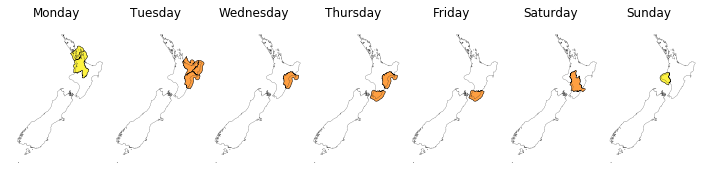

In [29]:
f, axes = plt.subplots(ncols=7, figsize=(12, 5), subplot_kw=dict(projection=crs))

f.subplots_adjust(wspace=0, bottom=0.1, top=0.9, left=0.1, right=0.9)

for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']): 
    
    ax = axes[i]
    
    make_choropleth(ax, shape_gpd_m, var=day, dict_colors=outlook_rgb)

    draw_NZ(ax, extent = extent)

    transform = ccrs.PlateCarree()._as_mpl_transform(ax)
    
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    ax.set_title(day)
    
    ax.outline_patch.set_visible(False)

In [30]:
f.savefig('../figures/map.png', bbox_inches='tight', dpi=200)

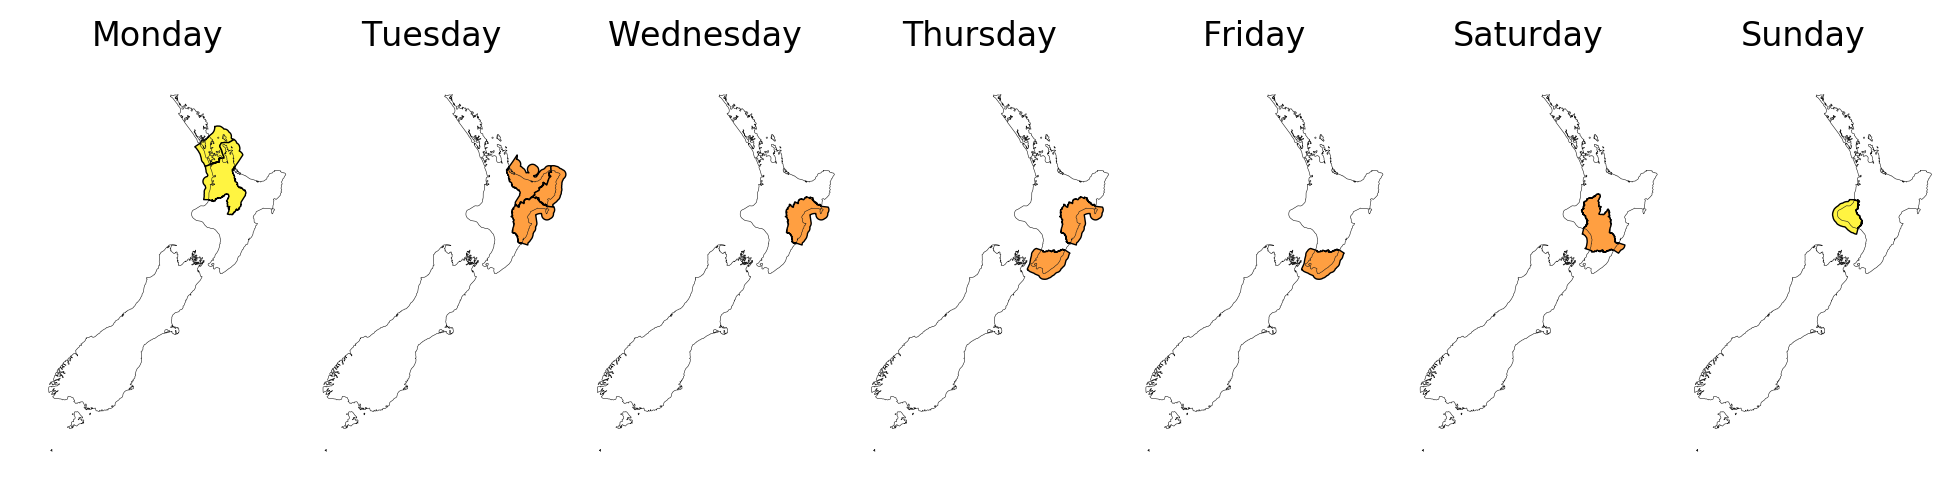

In [31]:
from IPython.display import Image
Image('../figures/map.png')